# Определение моментов инерции твёрдых тел с помощью трифилярного подвеса.

In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# TODO: Setup font

In [3]:
R = 114.6 / 1e3  # От центра до нити
r = 30.2  / 1e3  
sigma_R, sigma_r = 0.5 / 1e3 , 0.3 / 1e3
L = 2143  / 1e3 
sigma_L = 0.5 / 1e3
z0 = np.sqrt( np.square(L) - np.square(R  - r) )
print(f'z0 = {z0}')

z0 = 2.141337348481084


In [4]:
sigma_z0 = 0.5 / 1e3 # TODO: Написать/вычислить нормальное значение, хотя эта погрешность вообще не влияет
g = 9.815
four_pi_sq  = 4 * np.square(np.pi)
k = g * R * r / (four_pi_sq * z0)
print(f'k = {k}')

sigma_k = np.sqrt(
    np.square( g * r * sigma_R      / (four_pi_sq * z0) ) +\
    np.square( g * R * sigma_r      / (four_pi_sq * z0) ) +\
    np.square( g * R * r * sigma_z0 / (four_pi_sq * np.square(z0)) )
)
epsilon_k = (sigma_k / k) * 1e2
print(f'sigma_k = {sigma_k}, epsilon_k = {epsilon_k}%')  # Наибольшую погрешность вносит sigma_r

k = 0.0004018250763758491
sigma_k = 4.360685049769217e-06, epsilon_k = 1.0852197401663475%


### Определим моменты инерции

In [5]:
m = 965.7     / 1e3  # Масса одного лишь подвеса
sigma_m = 0.5 / 1e3
N = 9
t_plat = 39.337
T_plat = t_plat / N
# print(T_plat)
I_plat = k * m * np.square(T_plat)
print(f'I_plat = {I_plat}')

I_plat = 0.00741304642607989


In [6]:
M_disk = 584.7 / 1e3
t_disk = 35.183
T_disk = t_disk / N
# print(T_disk)
I_disk = k * (M_disk + m) * np.square(T_disk) - I_plat
print(f'I_disk = {I_disk}')

I_disk = 0.0021074920691102426


In [7]:
M_rod = 1273.0 / 1e3
t_rod = 33.171
T_rod = t_rod / N
I_rod = k * (M_rod + m) * np.square(T_rod) - I_plat
print(f'I_rod = {I_rod}')

I_rod = 0.0048067802202504065


In [8]:
M_disk_rod = M_disk + M_rod
t_disk_rod = 31.956
T_disk_rod = t_disk_rod / N
I_disk_rod = k * (M_disk_rod + m) * np.square(T_disk_rod) - I_plat
print(f'I_disk_rod = {I_disk_rod}')

print(f'I_disk + I_rod = {I_disk + I_rod}')

I_disk_rod = 0.0068900231883326415
I_disk + I_rod = 0.006914272289360649


### Рассчитаем погрешности моментов инерции

In [9]:
times = np.array( [22.599, 22.294, 22.738, 22.260, 22.591 ] )
sigma_t = np.std(times, ddof=1)
sigma_T = sigma_t / N

#  PLATFORM
sigma_I_plat = np.sqrt(
    np.square( m * np.square(T_plat) * sigma_k ) +\
    np.square( k * np.square(T_plat) * sigma_m ) +\
    np.square( k * m * 2 * T_plat * sigma_T )
)

print(f'sigma_I_plat = {sigma_I_plat}')

sigma_m_sum = np.sqrt(2) * sigma_m  # Так как в расчётной формуле фигурирует именно сумма масс.

#  DISK

sigma_I_disk = np.sqrt(
    np.square( (m + M_disk) * np.square(T_disk) * sigma_k ) +\
    np.square( k * np.square(T_disk) * sigma_m_sum ) +\
    np.square( k * (m + M_disk) * 2 * T_disk * sigma_T ) +\
    np.square( sigma_I_plat )
)
print(f'sigma_I_disk = {sigma_I_disk}')

#  ROD
sigma_I_rod = np.sqrt(
    np.square( (m + M_rod) * np.square(T_rod) * sigma_k ) +\
    np.square( k * np.square(T_rod) * sigma_m_sum ) +\
    np.square( k * (m + M_rod) * 2 * T_rod * sigma_T ) +\
    np.square( sigma_I_plat )
)
print(f'sigma_I_rod = {sigma_I_rod}')

#  DISK + ROD
sigma_I_disk_and_rod = np.sqrt(
    np.square( sigma_I_disk ) +\
    np.square( sigma_I_rod )
)
print(f'sigma_(I_rod + I_disk) = {sigma_I_disk_and_rod}')

#  DISK_ROD
sigma_m_sum = np.sqrt(3) * sigma_m
sigma_I_disk_rod = np.sqrt(
    np.square( (m + M_disk_rod) * np.square(T_disk_rod) * sigma_k ) +\
    np.square( k * np.square(T_disk_rod) * sigma_m_sum ) +\
    np.square( k * (m + M_disk_rod) * 2 * T_disk_rod * sigma_T ) +\
    np.square( sigma_I_plat )
)
print(f'sigma_I_disk_rod = {sigma_I_disk_rod}')

sigma_I_plat = 0.00011265283054749546
sigma_I_disk = 0.00019020100429026655
sigma_I_rod = 0.00023237837689991554
sigma_(I_rod + I_disk) = 0.00030029340999040456
sigma_I_disk_rod = 0.0002679566822001421


### Зависимость I от h

I_разрезанного_диска = 0.0019212027766010813, m_раз_диска = 1.4247339204758986
m_раз_диска по данным измерений = 1.5367 +- 0.0007071067811865476
Погрешность k = 0.29561745429882946, погрешность b = 0.00036922608207756404


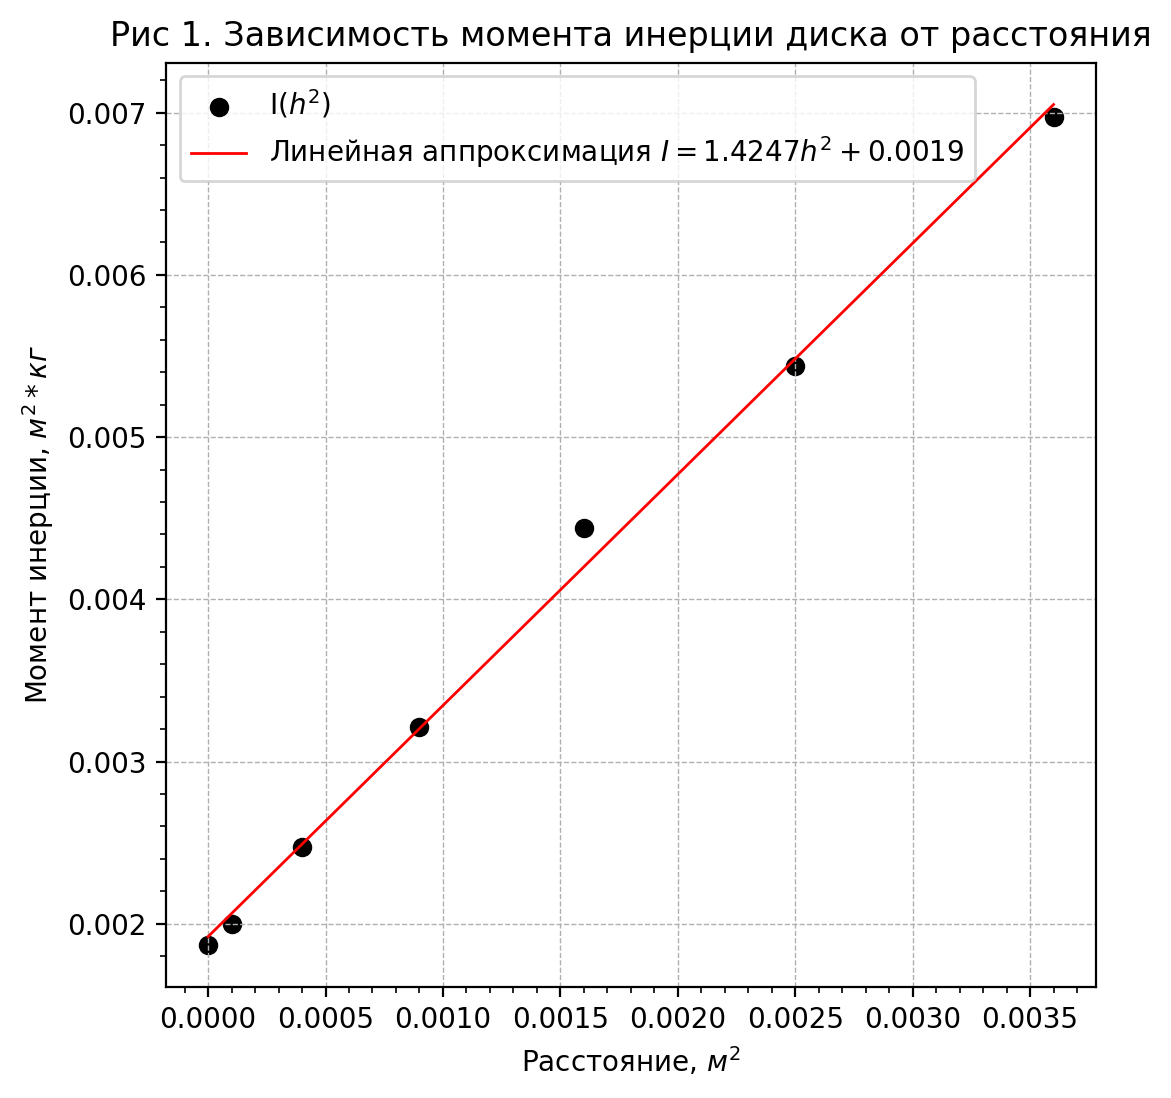

In [10]:
figure, axes = plt.subplots(figsize=(6, 6), dpi=200)

axes.minorticks_on()
axes.grid(which='major', linestyle='--', linewidth=0.5) # '-', '--', '-.', ':', '',

axes.set_ylabel('Момент инерции, $м^2 * кг$')
axes.set_xlabel('Расстояние, $м^2$')
axes.set_title('Рис 1. Зависимость момента инерции диска от расстояния', wrap=True)



M = (770.7 + 766) / 1e3
h_s = np.array([0.0,    10.0,   20.0,   30.0,   40.0,   50.0,     60.0])  # TODO: Find out how to set the type to floar
h_s /= 1e3
t_s = np.array([27.349, 27.536, 28.220, 29.258, 30.901, 32.176, 34.045])
I_s = []
for h, t in zip(h_s, t_s):
    T = t / N
    I = k * (M + m) * np.square(T) - I_plat
    I_s.append(I)
I_s = np.array(I_s)
# print(I_s)

h_sq = h_s * h_s

axes.scatter(h_sq, I_s, marker='o', color=[0,0,0], label=f'I($h^2$)')

(k, b) = np.polyfit(h_sq, I_s, 1)
x = np.array([min(h_sq), max(h_sq)])
axes.plot(x, k * x + b, '-r', linewidth=1, label=f'Линейная аппроксимация $I = {k:.4f}h^2 + {b:.4f}$')

axes.legend()

sigma_m = 0.5 / 1e3
sigma_M = np.sqrt(2) * sigma_m
sigma_k = 1 / np.sqrt(len(I_s)) * np.sqrt((np.mean(I_s * I_s) - np.mean(I_s) ** 2) /\
                                    (np.mean(h_sq ** 2) - (np.mean(h_sq) ** 2)) - k)
sigma_b = sigma_k * np.sqrt(np.mean(h_sq ** 2) - (np.mean(h_sq) ** 2))
print(f'I_разрезанного_диска = {b}, m_раз_диска = {k}')
print(f'm_раз_диска по данным измерений = {M} +- {sigma_M}')
print(f'Погрешность k = {sigma_k}, погрешность b = {sigma_b}')